In [18]:
%matplotlib inline
from __future__ import unicode_literals
import classifiers
import re
import nltk
from Politweet import get_tweets, get_transcript
import ratings
from sentiment import polarity_train, classify, prob_classify, plus_df, minus_df
import pandas as pd
from gensim import corpora, models, similarities
from itertools import chain
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import re
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', 1200)

tweets = get_tweets("./datasets/tweets.tsv")
articles = [" ".join(tweet["tokens"]) for i,tweet in tweets.iterrows()]
articles

[u'watch #tweetdebate drink wait start cringing mccain blunder',
 u"@ahg3 @michdot yeah slime actually second choice ca n't say first one okay roll",
 u'prepare heart attack #tweetdebate',
 u'debate moderator 50 sorry #tweetdebate',
 u'@current star black screen http //www.current.com/debate grrrrrrrrrrrrrrr #current',
 u'introduce mccain obama wait mccain show wow guess crisis washington #tweetdebate',
 u'#tweetdebate nice obama hold mccain hand use free hand wave audience keep mccain',
 u'obama -2 occupation war #tweetdebate',
 u'@tdefren nervous yes #tweetdebate',
 u'#tweetdebate golden parachute padding ceo obama',
 u'q obama avg american know golden parachute #tweetdebate',
 u'mccain give cheap plug ed kennedy -1 #tweetdebate #current',
 u'@current current channel reception continually suck get ta love comcast',
 u'mccain -3 kenndey comment #tweetdebate',
 u'mccain -2 know kennedy home watch debate #tweetdebate',
 u'#tweetdebate mccain start awkwardly',
 u'-1 mccain stall faux sym

In [19]:
import collections
import string
from pprint import pprint


def cluster_texts(texts, clusters=20):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(min_df=0.01, max_df=1.0, lowercase=False)
 
    tfidf_model = vectorizer.fit_transform(texts)
    inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        try:
            clustering[label].append(inv_map[idx])
        except:
            pass
 
    return clustering, km_model, tfidf_model


clusters, km_model, X = cluster_texts(articles, 6)
pprint(dict(clusters))

{0: [u'obama',
     u'president',
     u'really',
     u'stop',
     u'tell',
     u'time',
     u'twitter',
     u'world',
     u'wow'],
 1: [u'agree',
     u'anyone',
     u'biden',
     u'bush',
     u'ca',
     u'call',
     u'candidate',
     u'care',
     u'cnn',
     u'come',
     u'could',
     u'country',
     u'cut',
     u'fact',
     u'first',
     u'foreign',
     u'get',
     u'good',
     u'great',
     u'guy',
     u'iran',
     u'issue',
     u'job',
     u'keep',
     u'like',
     u'look',
     u'love',
     u'miss',
     u'much',
     u'next',
     u'oh',
     u'ok',
     u'old',
     u'one',
     u'pakistan',
     u'palin',
     u'people',
     u'plan',
     u'pow',
     u'say',
     u'see',
     u'show',
     u'sound',
     u'spending',
     u'still',
     u'thing',
     u'tinyurl',
     u'use',
     u'vote',
     u'wait',
     u'war',
     u'watch',
     u'well',
     u'work',
     u'would',
     u'year',
     u'yes'],
 2: [],
 3: [u'debate', u'even'],
 4: [u'ans

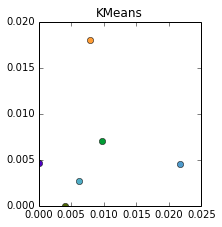

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9ACC', '#4E00C5', '#009C34', '#4E6606']


# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(6), colors):
    my_members = km_model.labels_ == k
    cluster_center = km_model.cluster_centers_[k]
#     ax.plot(X[my_members, 0], X[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')

